# Naive Bayes
-----

<div class="table-of-contents" style="background-color:#433878; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
    <p><a class='anchor' id='top' style="color: #EEEEEE">Table of contents:</a></p>
  <ul>
    <li style="color: #493628"><a href="#1" style="color: #EEEEEE">Importing the libraries </a></li>
    <li style="color: #493628"><a href="#2" style="color: #EEEEEE">Importing the dataset</a></li>
    <li style="color: #493628"><a href="#3" style="color: #EEEEEE">Data analysis</a></li>
    <li style="color: #493628"><a href="#4" style="color: #EEEEEE">Split the dataset into dependent/independent variables</a></li>
    <li style="color: #493628"><a href="#6" style="color: #EEEEEE">Spliting the dataset into thetraining set and test set</a></li> 
    <li style="color: #493628"><a href="#7" style="color: #EEEEEE">Training the Naive Bayes model on training set</a></li>
    <li style="color: #493628"><a href="#8" style="color: #EEEEEE">Predicting The Test set results</a></li>  
    <li style="color: #493628"><a href="#9" style="color: #EEEEEE">Visualsing the Training set results</a></li>  
    <li style="color: #493628"><a href="#10" style="color: #EEEEEE">model evaluation</a></li>
    <li style="color: #493628"><a href="#11" style="color: #EEEEEE">Plotting the Confusion Matrix for Classification Results</a></li>    
    <li style="color: #493628"><a href="#12" style="color: #EEEEEE">Calculating and Printing the Accuracy Score</a></li>  
    <li style="color: #493628"><a href="#13" style="color: #EEEEEE">Sources</a></li>  
  </ul>
</div>


## Step 1: <span id="1" style="color: #4A628A">Importing the libraries 📚 </span>[🔝](#top)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### For hide all warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 2: <span id="2" style="color: #4A628A">Importing the dataset 📥 </span>[🔝](#top)

In [3]:
dataset = pd.read_csv("Customer_Behaviour.csv")

### Data Shape and information

In [4]:
print (f"Shape of data {dataset.shape}")
print (f"Number of rows: {dataset.shape [0]}")
print (f"Number of columns: {dataset.shape [1]}")

Shape of data (400, 5)
Number of rows: 400
Number of columns: 5


In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
dataset["Gender"].unique()

array(['Male', 'Female'], dtype=object)

## Step 3: <span id="3" style="color: #4A628A">Data analysis ⚙️ </span>[🔝](#top)

In [8]:
# To analyze descriptive statistics of data
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Step 4: <span id="4" style="color: #4A628A">Data Preprocessing ✨</span>[🔝](#top)

In [11]:
dataset['Gender'] = dataset['Gender'].replace(['Male', 'Female'], [0, 1])
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


## Step 5: <span id="5" style="color: #4A628A">Split the dataset into dependent/independent variables ✂️ </span>[🔝](#top)

In [12]:
# independent variables
x = dataset.iloc[:,1:-1].values
# dependent variables
y = dataset.iloc[:,-1].values

y = y.reshape(len(y),1)

## Step 6: <span id="6" style="color: #4A628A">Spliting the dataset into thetraining set and test set 🗃️ </span>[🔝](#top)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,
                                                   random_state=0)

## Step 7: <span id="7" style="color: #4A628A">Training the Naive Bayes model on training set 🛠️ </span>[🔝](#top)

In [14]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

## Step 8: <span id="8" style="color: #4A628A">Predicting The Test set results 🎯 </span>[🔝](#top)

In [15]:
y_pred = classifier.predict(x_test)

In [16]:
df = pd.DataFrame({'Real Values':y_test.flatten().tolist(), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,1,1


## Step 9: <span id="9" style="color: #4A628A">Visualsing the Training set results 📊 </span>[🔝](#top)

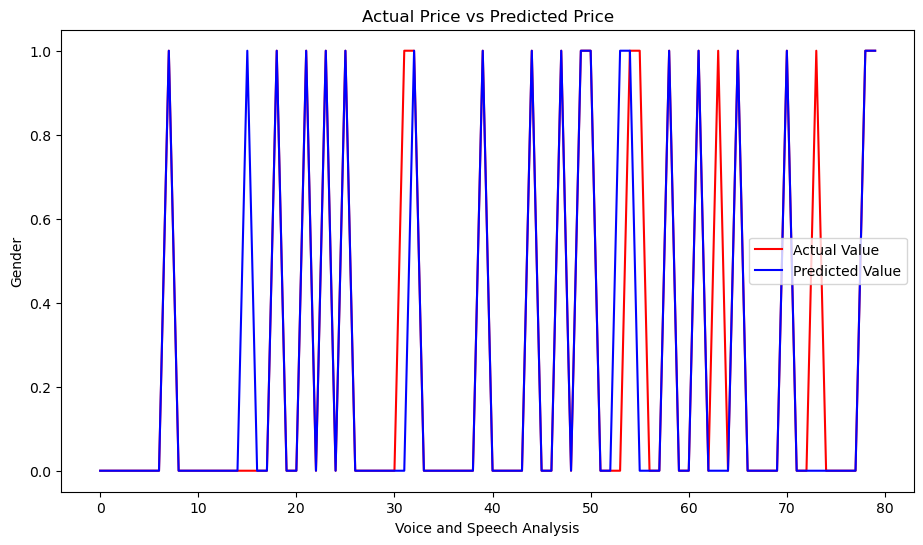

In [17]:
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.show()

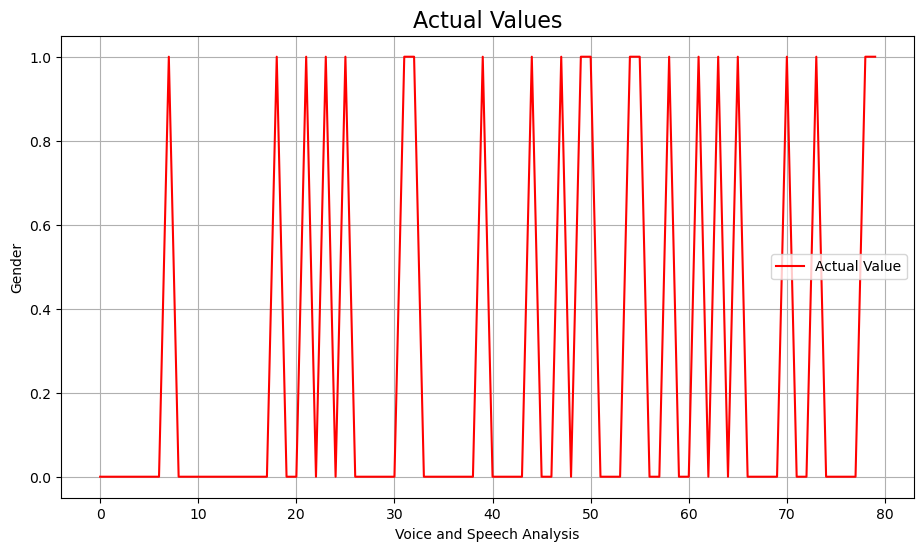

In [18]:
# Plot for Actual Values
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.title('Actual Values', fontsize=16)
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.grid(True)
plt.show()

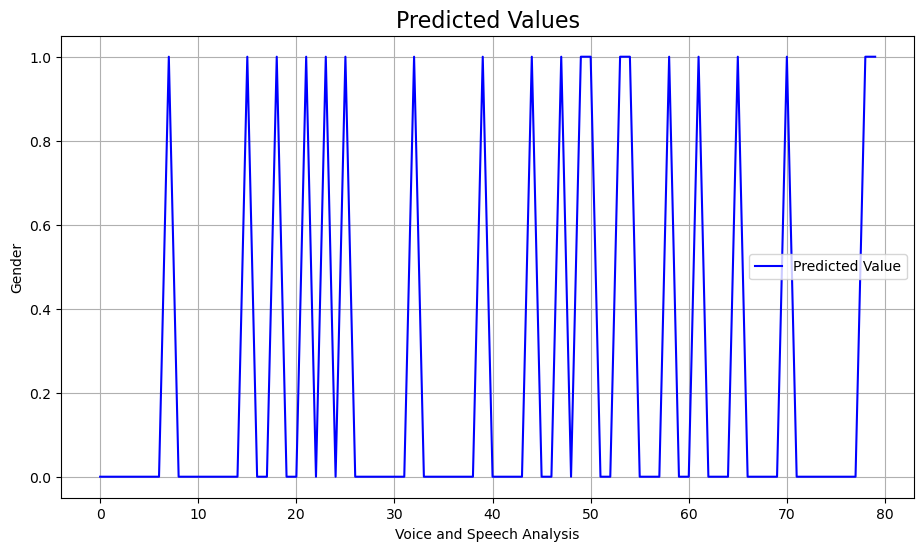

In [19]:
# Plot for Predicted Values
plt.figure(figsize=(11, 6))
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Predicted Values', fontsize=16)
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.grid(True)
plt.show()

## Step 10: <span id="10" style="color: #4A628A">model evaluation ⚡ </span>[🔝](#top)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
print('mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  0.075
mean_absolute_error :  0.075


## Step 11: <span id="11" style="color: #4A628A">Plotting the Confusion Matrix for Classification Results 🌟 </span>[🔝](#top)

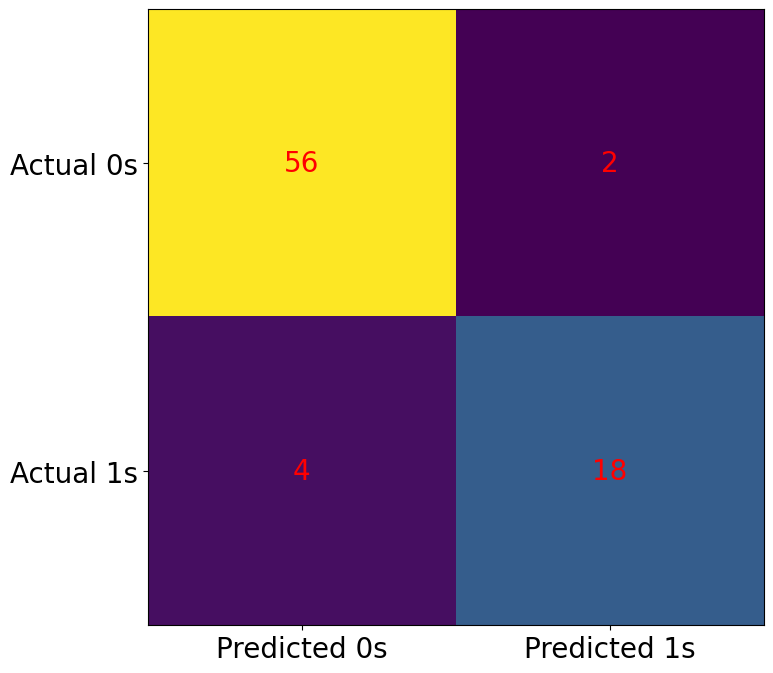

In [21]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test , y_pred)

# Create figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix)
ax.grid(False)

# Set labels for the axes
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))

# Customize the tick label font size
ax.tick_params(axis='both', which='major', labelsize=20)

# Set limits for the vertical axis
ax.set_ylim(1.5, -0.5)

# Add text annotations in each cell of the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red", fontsize=20)

plt.show()

## Step 12: <span id="12" style="color: #4A628A">Calculating and Printing the Accuracy Score 🚀 </span>[🔝](#top)

In [22]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.925


## <a id="13">Sources 📝</a>:<a class='anchor' id='images'></a> [🔝](#top)
----
- scikit-learn.org : https://scikit-learn.org/1.5/modules/naive_bayes.html
- kaggle : https://www.kaggle.com/datasets/denisadutca/customer-behaviour
- Machine Learning A-Z: AI, Python & R + ChatGPT Prize [2024] : https://www.udemy.com/course/machinelearning/?couponCode=2021PM20